# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
with zipfile.ZipFile('/content/drive/MyDrive/MIT_Capstone_Project/Facial_emotion_images.zip', 'r') as image_zip:
  image_zip.extractall()

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

In [4]:
def image_plot(emotion, size = 64, folder_path = "Facial_emotion_images/"):
  plt.figure(figsize= (8,8))
  for i in range(1, 13, 1):
    plt.subplot(3, 4, i)
    img = load_img(folder_path + "train/" + emotion + "/" +
                  os.listdir(folder_path + "train/" + emotion)[i], target_size = (size, size))
    plt.imshow(img)
  return plt.show()

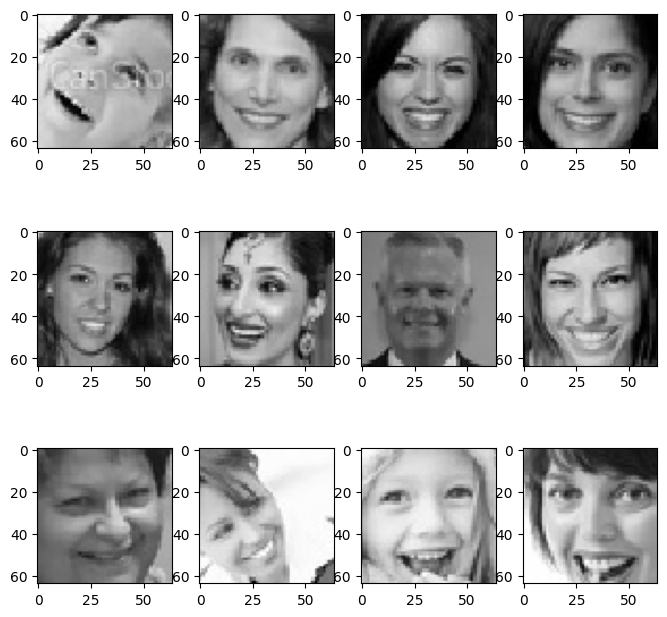

In [5]:
image_plot(emotion = 'happy')

**Observations and Insights:__**
1. Things for the Neural Network to be looking out for as unique features when identifying the happy images is the shape of the mouth as well as the cheekbones. Eyes can also be an indication as they tend to be more squinted when smiling.

### **Sad**

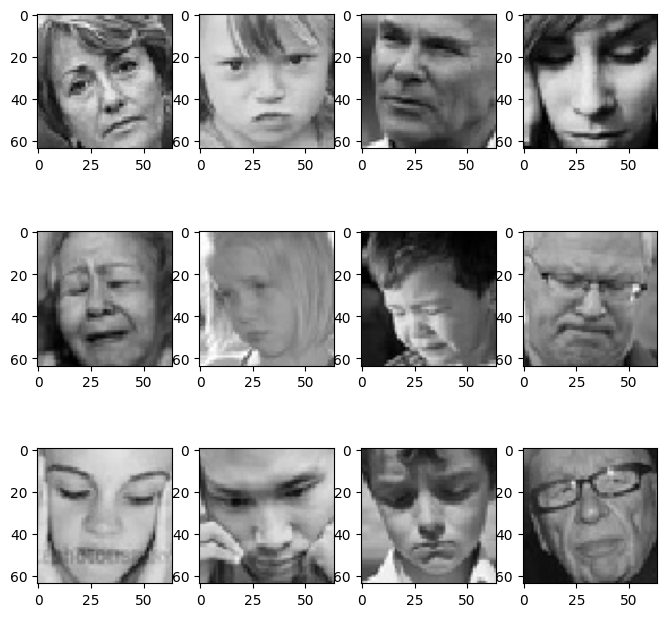

In [6]:
image_plot(emotion = "sad")

**Observations and Insights:__**
1. Unique features here could be the shape of the mouth, the shape of the eyebrows and potentially placement of the hands within the images.

### **Neutral**

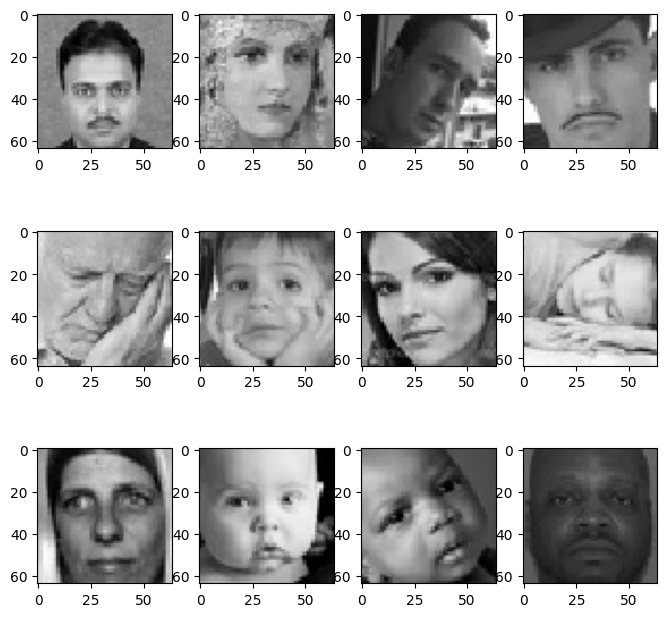

In [7]:
image_plot(emotion = "neutral")

**Observations and Insights:__**
1. Unique features here could be the lack of any prominent feature in comparison to happy and sad. The eyebrows are not arched. The lips and eyes could be a unique feature as they would be in the resting positions.

### **Surprised**

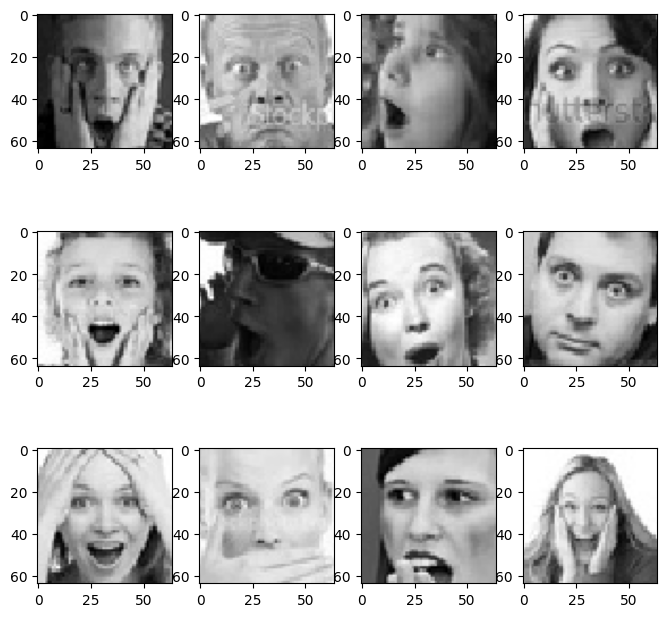

In [8]:
image_plot(emotion = "surprise")

**Observations and Insights:__**
1. Unique Feature could be the way that the mouths are open in all of the pictures and potentially the positioning of hands if any within the images.

## **Checking Distribution of Classes**

In [9]:
def length_of_emotions(emotion, folder_path = "Facial_emotion_images/", emotion_folder = 'train/'):
  num_emotion = len(os.listdir(folder_path + emotion_folder + emotion))
  print("There are {} images in the class '{}'. ".format(num_emotion, emotion))
  return num_emotion

In [10]:
num_happy = length_of_emotions("happy")
print(num_happy)
num_sad = length_of_emotions("sad")
print(num_sad)
num_neutral = length_of_emotions("neutral")
print(num_neutral)
num_surprise = length_of_emotions("surprise")
print(num_surprise)

There are 3976 images in the class 'happy'. 
3976
There are 3982 images in the class 'sad'. 
3982
There are 3978 images in the class 'neutral'. 
3978
There are 3173 images in the class 'surprise'. 
3173


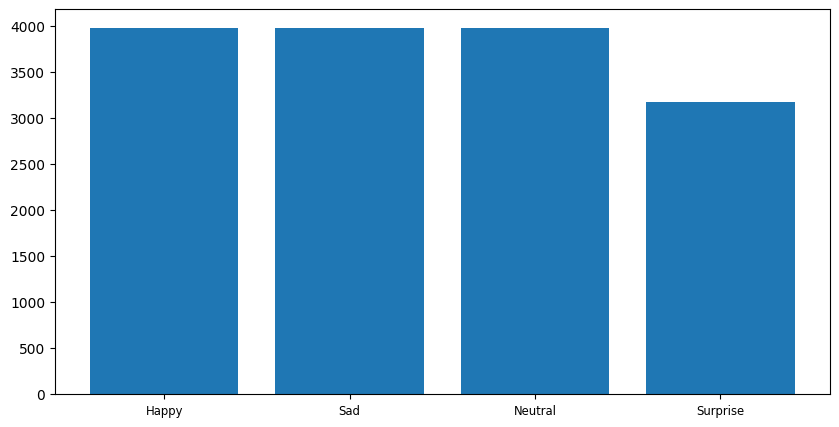

In [11]:
plt.figure(figsize = (10, 5))

emotions_dict = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

emotions_df = pd.Series(emotions_dict)

plt.bar(range(len(emotions_df)), emotions_df.values, align = 'center')

plt.xticks(range(len(emotions_df)), emotions_df.index.values, size = 'small')

plt.show()

**Observations and Insights:__**
1. There are approximately 3980 images each for Happy, Sad, and Neutral in the Training set. There is only about 3173 images in the Surprise folder in the Training set.
2. The imbalance here could mean that the neural network will not be able to judge the surprise images as accurately as the other emotions.

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [12]:
data_generator = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    rotation_range=20,  # Randomly rotate images within the range of 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of the height
    horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range = (0. , 2.),
    shear_range = 0.3
)

# Define the batch size and image size and setting folder path
batch_size = 32
image_size = (64,64)
folder_path = "Facial_emotion_images/"

# Create the train, validation, and test data generators using flow_from_directory
train_generator = data_generator.flow_from_directory(
    folder_path + 'train',
    target_size=image_size,
    color_mode = 'rgb',
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have categorical labels
    shuffle=True
)

validation_generator = data_generator.flow_from_directory(
    folder_path + 'validation',
    target_size=image_size,
    color_mode = 'rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = data_generator.flow_from_directory(
    folder_path + 'test',
    target_size=image_size,
    color_mode = 'rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [13]:
data_generator_grayscale = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    rotation_range=20,  # Randomly rotate images within the range of 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of the height
    horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range = (0. , 2.),
    shear_range = 0.3
)

# Define the batch size and image size and setting folder path
batch_size = 32
image_size = (64,64)
folder_path = "Facial_emotion_images/"

# Create the train, validation, and test data generators using flow_from_directory
train_generator_gray = data_generator.flow_from_directory(
    folder_path + 'train',
    target_size=image_size,
    color_mode = 'grayscale',
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have categorical labels
    shuffle=True
)

validation_generator_gray = data_generator.flow_from_directory(
    folder_path + 'validation',
    target_size=image_size,
    color_mode = 'grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator_gray = data_generator.flow_from_directory(
    folder_path + 'test',
    target_size=image_size,
    color_mode = 'grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


# Observations and Insights

1. I created 2 sets of data loaders, one with RGB and the other with Grayscale. I did this in order to test the model on both RGB and Grayscale to evaluate which one would perform better.
2. For the first Model I introduced extra parameters such as rotating randomly, resizing horizontally and vertically, and flipping horizontally to evaluate if training the model this way would be beneficial. However from the sample images that were retrieved in the above section, we can see that there are some that already have rotations, whether to keep these extra parameters will be seen within the first model.

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [14]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [15]:
model = Sequential()

# First Convolutional layer with 16 nodes and kernel size of 3 x 3 with same padding
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (64, 64, 3)))

# Applying LeakyRelu
model.add(LeakyReLU(0.1))

# Second Convolutional layer with 32 nodes and kernel size of 3x3 with same padding
model.add(Conv2D(filters= 32, kernel_size = (3, 3), padding = 'same'))

# Applying Leaky Relu
model.add(LeakyReLU(0.1))

# Applying MaxPooling with pool size of 2 x 2
model.add(MaxPooling2D(pool_size= (2, 2)))

# Flattening the output from the previous layer
model.add(Flatten())

# Applying a dense layer of 32 nodes
model.add(Dense(32))

# Applying Leaky Relu with 0.1 slope
model.add(LeakyReLU(0.1))

# Output layer of 4 nodes as per the number of classes with softmax activation
model.add(Dense(4, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                        

### **Compiling and Training the Model**

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [18]:
model.compile(loss = 'categorical_crossentropy',

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),

metrics=['accuracy'])

In [19]:
history = model.fit(train_generator, epochs=20, verbose=1, validation_data=validation_generator, callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3741 - accuracy: 0.3031

473/473 [==============================] - 56s 97ms/step - loss: 1.3741 - accuracy: 0.3031 - val_loss: 1.3248 - val_accuracy: 0.3747 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.3424 - accuracy: 0.3420

473/473 [==============================] - 44s 93ms/step - loss: 1.3424 - accuracy: 0.3420 - val_loss: 1.3202 - val_accuracy: 0.3595 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.3267 - accuracy: 0.3549

473/473 [==============================] - 43s 92ms/step - loss: 1.3267 - accuracy: 0.3549 - val_loss: 1.3177 - val_accuracy: 0.3486 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.3087 - accuracy: 0.3692

473/473 [==============================] - 43s 92ms/step - loss: 1.3087 - accuracy: 0.3692 - val_loss: 1.3113 - val_accuracy: 0.3582 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.2877 - accuracy: 0.3920

473/473 [==============================] - 44s 92ms/step - loss: 1.2877 - accuracy: 0.3920 - val_loss: 1.2486 - val_accuracy: 0.4242 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.2642 - accuracy: 0.4105

473/473 [==============================] - 44s 94ms/step - loss: 1.2642 - accuracy: 0.4105 - val_loss: 1.2784 - val_accuracy: 0.3876 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.2494 - accuracy: 0.4140

473/473 [==============================] - 43s 91ms/step - loss: 1.2494 - accuracy: 0.4140 - val_loss: 1.2366 - val_accuracy: 0.4352 - lr: 0.0010
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 1.2289 - accuracy: 0.4267

473/473 [==============================] - 43s 91ms/step - loss: 1.2289 - accuracy: 0.4267 - val_loss: 1.2292 - val_accuracy: 0.4326 - lr: 0.0010
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 1.2211 - accuracy: 0.4387

473/473 [==============================] - 43s 91ms/step - loss: 1.2211 - accuracy: 0.4387 - val_loss: 1.2421 - val_accuracy: 0.4195 - lr: 0.0010
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 1.1974 - accuracy: 0.4489

473/473 [==============================] - 43s 91ms/step - loss: 1.1974 - accuracy: 0.4489 - val_loss: 1.1890 - val_accuracy: 0.4587 - lr: 0.0010
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 1.1859 - accuracy: 0.4612

473/473 [==============================] - 43s 90ms/step - loss: 1.1859 - accuracy: 0.4612 - val_loss: 1.2008 - val_accuracy: 0.4611 - lr: 0.0010
Epoch 12/20
473/473 [==============================] - ETA: 0s - loss: 1.1802 - accuracy: 0.4597

473/473 [==============================] - 44s 92ms/step - loss: 1.1802 - accuracy: 0.4597 - val_loss: 1.1720 - val_accuracy: 0.4686 - lr: 0.0010
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 1.1681 - accuracy: 0.4728

473/473 [==============================] - 44s 93ms/step - loss: 1.1681 - accuracy: 0.4728 - val_loss: 1.1607 - val_accuracy: 0.4834 - lr: 0.0010
Epoch 14/20
473/473 [==============================] - ETA: 0s - loss: 1.1562 - accuracy: 0.4781

473/473 [==============================] - 45s 94ms/step - loss: 1.1562 - accuracy: 0.4781 - val_loss: 1.1433 - val_accuracy: 0.4919 - lr: 0.0010
Epoch 15/20
473/473 [==============================] - ETA: 0s - loss: 1.1474 - accuracy: 0.4891

473/473 [==============================] - 44s 92ms/step - loss: 1.1474 - accuracy: 0.4891 - val_loss: 1.1183 - val_accuracy: 0.5017 - lr: 0.0010
Epoch 16/20
473/473 [==============================] - ETA: 0s - loss: 1.1362 - accuracy: 0.4920

473/473 [==============================] - 44s 92ms/step - loss: 1.1362 - accuracy: 0.4920 - val_loss: 1.1314 - val_accuracy: 0.5087 - lr: 0.0010
Epoch 17/20
473/473 [==============================] - ETA: 0s - loss: 1.1349 - accuracy: 0.4959

473/473 [==============================] - 44s 93ms/step - loss: 1.1349 - accuracy: 0.4959 - val_loss: 1.0982 - val_accuracy: 0.5168 - lr: 0.0010
Epoch 18/20
473/473 [==============================] - ETA: 0s - loss: 1.1263 - accuracy: 0.4998

473/473 [==============================] - 43s 92ms/step - loss: 1.1263 - accuracy: 0.4998 - val_loss: 1.0962 - val_accuracy: 0.5172 - lr: 0.0010
Epoch 19/20
473/473 [==============================] - ETA: 0s - loss: 1.1131 - accuracy: 0.5117

473/473 [==============================] - 44s 92ms/step - loss: 1.1131 - accuracy: 0.5117 - val_loss: 1.1192 - val_accuracy: 0.5134 - lr: 0.0010
Epoch 20/20
473/473 [==============================] - ETA: 0s - loss: 1.1161 - accuracy: 0.5043

473/473 [==============================] - 44s 94ms/step - loss: 1.1161 - accuracy: 0.5043 - val_loss: 1.0853 - val_accuracy: 0.5228 - lr: 0.0010


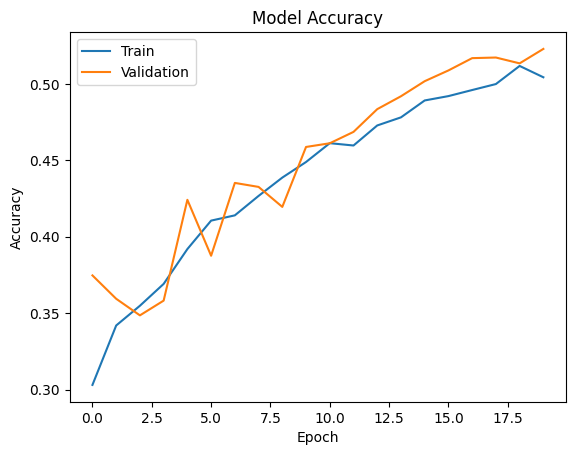

In [20]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [21]:
from tensorflow.keras import backend

backend.clear_session()

In [22]:
model_gray = Sequential()

# First Convolutional layer with 16 nodes and kernel size of 3 x 3 with same padding
model_gray.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (64, 64, 1)))

# Applying LeakyRelu
model_gray.add(LeakyReLU(0.1))

# Second Convolutional layer with 32 nodes and kernel size of 3x3 with same padding
model_gray.add(Conv2D(filters= 32, kernel_size = (3, 3), padding = 'same'))

# Applying Leaky Relu
model_gray.add(LeakyReLU(0.1))

# Applying MaxPooling with pool size of 2 x 2
model_gray.add(MaxPooling2D(pool_size= (2, 2)))

# Flattening the output from the previous layer
model_gray.add(Flatten())

# Applying a dense layer of 32 nodes
model_gray.add(Dense(32))

# Applying Leaky Relu with 0.1 slope
model_gray.add(LeakyReLU(0.1))

# Output layer of 4 nodes as per the number of classes with softmax activation
model_gray.add(Dense(4, activation = "softmax"))

In [23]:
model_gray.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                        

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [25]:
model_gray.compile(loss = 'categorical_crossentropy',

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),

metrics=['accuracy'])

In [26]:
history2 = model_gray.fit(train_generator_gray, epochs=20, verbose=1, validation_data=validation_generator_gray, callbacks = callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.3770 - accuracy: 0.2910

473/473 [==============================] - 29s 57ms/step - loss: 1.3771 - accuracy: 0.2908 - val_loss: 1.3435 - val_accuracy: 0.3546 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.3550 - accuracy: 0.3201

473/473 [==============================] - 27s 57ms/step - loss: 1.3552 - accuracy: 0.3198 - val_loss: 1.3302 - val_accuracy: 0.3259 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.3434 - accuracy: 0.3391

473/473 [==============================] - 27s 57ms/step - loss: 1.3433 - accuracy: 0.3392 - val_loss: 1.3107 - val_accuracy: 0.3777 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.3241 - accuracy: 0.3598

473/473 [==============================] - 27s 57ms/step - loss: 1.3241 - accuracy: 0.3598 - val_loss: 1.2889 - val_accuracy: 0.3791 - lr: 0.0010
Epoch 5/20
472/473 [============================>.] - ETA: 0s - loss: 1.2920 - accuracy: 0.3840

473/473 [==============================] - 27s 56ms/step - loss: 1.2918 - accuracy: 0.3841 - val_loss: 1.2664 - val_accuracy: 0.4008 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.2608 - accuracy: 0.4074

473/473 [==============================] - 30s 64ms/step - loss: 1.2608 - accuracy: 0.4074 - val_loss: 1.2347 - val_accuracy: 0.4213 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.2424 - accuracy: 0.4246

473/473 [==============================] - 27s 56ms/step - loss: 1.2424 - accuracy: 0.4246 - val_loss: 1.2139 - val_accuracy: 0.4499 - lr: 0.0010
Epoch 8/20
472/473 [============================>.] - ETA: 0s - loss: 1.2227 - accuracy: 0.4336

473/473 [==============================] - 27s 57ms/step - loss: 1.2228 - accuracy: 0.4336 - val_loss: 1.2097 - val_accuracy: 0.4639 - lr: 0.0010
Epoch 9/20
472/473 [============================>.] - ETA: 0s - loss: 1.2094 - accuracy: 0.4432

473/473 [==============================] - 26s 56ms/step - loss: 1.2094 - accuracy: 0.4432 - val_loss: 1.1792 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 10/20
472/473 [============================>.] - ETA: 0s - loss: 1.1984 - accuracy: 0.4523

473/473 [==============================] - 26s 56ms/step - loss: 1.1988 - accuracy: 0.4520 - val_loss: 1.1926 - val_accuracy: 0.4555 - lr: 0.0010
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 1.1807 - accuracy: 0.4646

473/473 [==============================] - 27s 57ms/step - loss: 1.1807 - accuracy: 0.4646 - val_loss: 1.1619 - val_accuracy: 0.4756 - lr: 0.0010
Epoch 12/20
473/473 [==============================] - ETA: 0s - loss: 1.1756 - accuracy: 0.4671

473/473 [==============================] - 27s 57ms/step - loss: 1.1756 - accuracy: 0.4671 - val_loss: 1.1674 - val_accuracy: 0.4868 - lr: 0.0010
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 1.1617 - accuracy: 0.4788

473/473 [==============================] - 27s 57ms/step - loss: 1.1617 - accuracy: 0.4788 - val_loss: 1.1315 - val_accuracy: 0.4955 - lr: 0.0010
Epoch 14/20
473/473 [==============================] - ETA: 0s - loss: 1.1611 - accuracy: 0.4743

473/473 [==============================] - 27s 58ms/step - loss: 1.1611 - accuracy: 0.4743 - val_loss: 1.1391 - val_accuracy: 0.4899 - lr: 0.0010
Epoch 15/20
472/473 [============================>.] - ETA: 0s - loss: 1.1455 - accuracy: 0.4798

473/473 [==============================] - 31s 65ms/step - loss: 1.1452 - accuracy: 0.4802 - val_loss: 1.1346 - val_accuracy: 0.4959 - lr: 0.0010
Epoch 16/20
472/473 [============================>.] - ETA: 0s - loss: 1.1403 - accuracy: 0.4915

473/473 [==============================] - 27s 57ms/step - loss: 1.1404 - accuracy: 0.4916 - val_loss: 1.1075 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 17/20
473/473 [==============================] - ETA: 0s - loss: 1.1327 - accuracy: 0.4907

473/473 [==============================] - 27s 56ms/step - loss: 1.1327 - accuracy: 0.4907 - val_loss: 1.1367 - val_accuracy: 0.5057 - lr: 0.0010
Epoch 18/20
472/473 [============================>.] - ETA: 0s - loss: 1.1312 - accuracy: 0.4981

473/473 [==============================] - 30s 64ms/step - loss: 1.1311 - accuracy: 0.4981 - val_loss: 1.1473 - val_accuracy: 0.4951 - lr: 0.0010
Epoch 19/20
473/473 [==============================] - ETA: 0s - loss: 1.1199 - accuracy: 0.5014Restoring model weights from the end of the best epoch: 16.



Epoch 19: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 27s 58ms/step - loss: 1.1199 - accuracy: 0.5014 - val_loss: 1.1246 - val_accuracy: 0.4951 - lr: 0.0010
Epoch 19: early stopping


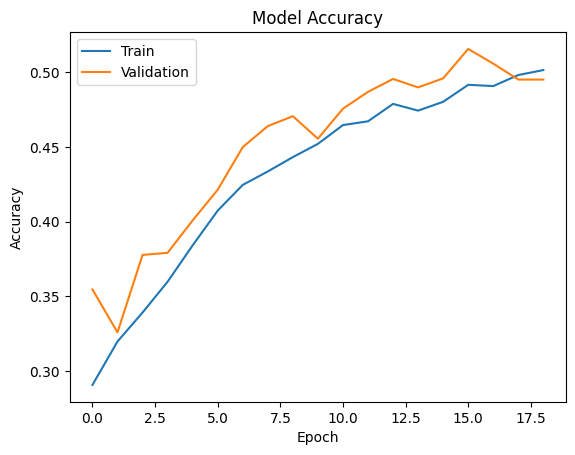

In [27]:
plt.plot(history2.history['accuracy'])

plt.plot(history2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

# Observation


1.   From the output of the graph we can see that both Gray and RGB are performing equally as well at 20 epochs. They both reach approximately 50 percent for both the Accuracy and the validation accuracy.
2.   Main difference that we can see is the time it takes to train the set. For this purpose we will be using the grayscale for the remaining of the testing.



### **Evaluating the Model on the Test Set**

In [28]:
# Evaluating the RGB model
model.evaluate(test_generator)

4/4 [==============================] - 0s 67ms/step - loss: 1.0434 - accuracy: 0.5078


[1.0434153079986572, 0.5078125]

In [29]:
# Evaluating the grayscale model
model_gray.evaluate(test_generator_gray)

4/4 [==============================] - 0s 37ms/step - loss: 1.1409 - accuracy: 0.5078


[1.1409164667129517, 0.5078125]

**Observations and Insights:__**
1. Evaluating the same neural network on both the Grayscale and the RGB we can see that they both do approximately as well as each other at about 50.7 percent.
2. In terms of time taken to run the model, grayscale performs faster. I will be going with the grayscale for this reason although there is no significant difference from the RGB model.

In [30]:
from tensorflow.keras import backend

backend.clear_session()

### **Creating the second Convolutional Neural Network**

In [31]:
data_generator_grayscale_2 = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    #rotation_range=20,  # Randomly rotate images within the range of 20 degrees
    #width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the width
    #height_shift_range=0.2,  # Randomly shift images vertically by 20% of the height
    #horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range = (0. , 2.),
    shear_range = 0.3
)

# Define the batch size and image size and setting folder path
batch_size = 32
image_size = (64,64)
folder_path = "Facial_emotion_images/"

# Create the train, validation, and test data generators using flow_from_directory
train_generator_gray_2 = data_generator_grayscale_2.flow_from_directory(
    folder_path + 'train',
    target_size=image_size,
    color_mode = 'grayscale',
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have categorical labels
    shuffle=True
)

validation_generator_gray_2 = data_generator_grayscale_2.flow_from_directory(
    folder_path + 'validation',
    target_size=image_size,
    color_mode = 'grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator_gray_2 = data_generator_grayscale_2.flow_from_directory(
    folder_path + 'test',
    target_size=image_size,
    color_mode = 'grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


- Try out a slightly larger architecture

In [32]:
model_gray_2 = Sequential()

# First Convolutional layer with 16 nodes and kernel size of 3 x 3 with same padding
model_gray_2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (64, 64, 1)))

# Applying LeakyRelu
model_gray_2.add(LeakyReLU(0.1))

# Second Convolutional layer with 64 nodes and kernel size of 3x3 with same padding
model_gray_2.add(Conv2D(filters= 64, kernel_size = (3, 3), padding = 'same'))

# Applying Leaky Relu
model_gray_2.add(LeakyReLU(0.1))

# Applying MaxPooling with pool size of 2 x 2
model_gray_2.add(MaxPooling2D(pool_size= (2, 2)))

model_gray_2.add(Dropout(0.5))

model_gray_2.add(LeakyReLU(0.1))

# Third Convolutional Layer with 64 nodes
model_gray_2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

model_gray_2.add(LeakyReLU(0.1))

model_gray_2.add(MaxPooling2D(pool_size= (2, 2)))

model_gray_2.add(BatchNormalization())
# Fourth Convolutional layer with 32 nodes
model_gray_2.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))

model_gray_2.add(LeakyReLU(0.1))

model_gray_2.add(MaxPooling2D(pool_size = (2,2)))

# Fifth Convolutional layer with 32 nodes
model_gray_2.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))

model_gray_2.add(LeakyReLU(0.1))
# Sixth Convolutional layer with 16 nodes
model_gray_2.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))

model_gray_2.add(LeakyReLU(0.1))

model_gray_2.add(MaxPooling2D(pool_size= (2,2)))

model_gray_2.add(BatchNormalization())

# Flattening the output from the previous layer
model_gray_2.add(Flatten())

# Applying a dense layer of 32 nodes
model_gray_2.add(Dense(32))

# Applying Leaky Relu with 0.1 slope
model_gray_2.add(LeakyReLU(0.1))

model_gray_2.add(Dropout(0.5))

# Output layer of 4 nodes as per the number of classes with softmax activation
model_gray_2.add(Dense(4, activation = "softmax"))

In [33]:
model_gray_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        9280      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                        

### **Compiling and Training the Model**

In [34]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 40

In [35]:
model_gray_2.compile(loss = 'categorical_crossentropy',

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),

metrics=['accuracy'])

In [36]:
history_gray_2 = model_gray_2.fit(train_generator_gray_2, epochs=epochs, verbose=1, validation_data=validation_generator_gray_2, callbacks = callbacks_list)

Epoch 1/40
473/473 [==============================] - ETA: 0s - loss: 1.3999 - accuracy: 0.2753

473/473 [==============================] - 32s 59ms/step - loss: 1.3999 - accuracy: 0.2753 - val_loss: 1.3530 - val_accuracy: 0.3408 - lr: 0.0010
Epoch 2/40
472/473 [============================>.] - ETA: 0s - loss: 1.3336 - accuracy: 0.3448

473/473 [==============================] - 27s 58ms/step - loss: 1.3335 - accuracy: 0.3448 - val_loss: 1.2929 - val_accuracy: 0.3822 - lr: 0.0010
Epoch 3/40
473/473 [==============================] - ETA: 0s - loss: 1.1919 - accuracy: 0.4581

473/473 [==============================] - 27s 57ms/step - loss: 1.1919 - accuracy: 0.4581 - val_loss: 1.1103 - val_accuracy: 0.5136 - lr: 0.0010
Epoch 4/40
473/473 [==============================] - ETA: 0s - loss: 1.0992 - accuracy: 0.5120

473/473 [==============================] - 27s 57ms/step - loss: 1.0992 - accuracy: 0.5120 - val_loss: 1.0899 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 5/40
473/473 [==============================] - ETA: 0s - loss: 1.0289 - accuracy: 0.5490

473/473 [==============================] - 27s 57ms/step - loss: 1.0289 - accuracy: 0.5490 - val_loss: 0.9769 - val_accuracy: 0.5827 - lr: 0.0010
Epoch 6/40
473/473 [==============================] - ETA: 0s - loss: 0.9631 - accuracy: 0.5802

473/473 [==============================] - 27s 57ms/step - loss: 0.9631 - accuracy: 0.5802 - val_loss: 0.8998 - val_accuracy: 0.6233 - lr: 0.0010
Epoch 7/40
473/473 [==============================] - ETA: 0s - loss: 0.9137 - accuracy: 0.6049

473/473 [==============================] - 31s 65ms/step - loss: 0.9137 - accuracy: 0.6049 - val_loss: 0.8637 - val_accuracy: 0.6460 - lr: 0.0010
Epoch 8/40
473/473 [==============================] - ETA: 0s - loss: 0.8791 - accuracy: 0.6259

473/473 [==============================] - 27s 57ms/step - loss: 0.8791 - accuracy: 0.6259 - val_loss: 0.8604 - val_accuracy: 0.6454 - lr: 0.0010
Epoch 9/40
473/473 [==============================] - ETA: 0s - loss: 0.8465 - accuracy: 0.6343

473/473 [==============================] - 27s 57ms/step - loss: 0.8465 - accuracy: 0.6343 - val_loss: 0.8300 - val_accuracy: 0.6620 - lr: 0.0010
Epoch 10/40
473/473 [==============================] - ETA: 0s - loss: 0.8222 - accuracy: 0.6519

473/473 [==============================] - 27s 56ms/step - loss: 0.8222 - accuracy: 0.6519 - val_loss: 0.8177 - val_accuracy: 0.6689 - lr: 0.0010
Epoch 11/40
472/473 [============================>.] - ETA: 0s - loss: 0.8050 - accuracy: 0.6580

473/473 [==============================] - 26s 56ms/step - loss: 0.8050 - accuracy: 0.6580 - val_loss: 0.8035 - val_accuracy: 0.6735 - lr: 0.0010
Epoch 12/40
472/473 [============================>.] - ETA: 0s - loss: 0.7812 - accuracy: 0.6729

473/473 [==============================] - 26s 56ms/step - loss: 0.7813 - accuracy: 0.6730 - val_loss: 0.7793 - val_accuracy: 0.6904 - lr: 0.0010
Epoch 13/40
473/473 [==============================] - ETA: 0s - loss: 0.7545 - accuracy: 0.6782

473/473 [==============================] - 26s 55ms/step - loss: 0.7545 - accuracy: 0.6782 - val_loss: 0.7838 - val_accuracy: 0.6731 - lr: 0.0010
Epoch 14/40
472/473 [============================>.] - ETA: 0s - loss: 0.7459 - accuracy: 0.6831

473/473 [==============================] - 26s 56ms/step - loss: 0.7458 - accuracy: 0.6829 - val_loss: 0.7672 - val_accuracy: 0.6956 - lr: 0.0010
Epoch 15/40
472/473 [============================>.] - ETA: 0s - loss: 0.7273 - accuracy: 0.6980

473/473 [==============================] - 27s 57ms/step - loss: 0.7273 - accuracy: 0.6979 - val_loss: 0.8107 - val_accuracy: 0.6878 - lr: 0.0010
Epoch 16/40
472/473 [============================>.] - ETA: 0s - loss: 0.7147 - accuracy: 0.7008

473/473 [==============================] - 27s 57ms/step - loss: 0.7150 - accuracy: 0.7006 - val_loss: 0.7869 - val_accuracy: 0.7004 - lr: 0.0010
Epoch 17/40
473/473 [==============================] - ETA: 0s - loss: 0.7049 - accuracy: 0.7023Restoring model weights from the end of the best epoch: 14.



Epoch 17: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 31s 65ms/step - loss: 0.7049 - accuracy: 0.7023 - val_loss: 0.7705 - val_accuracy: 0.7018 - lr: 0.0010
Epoch 17: early stopping


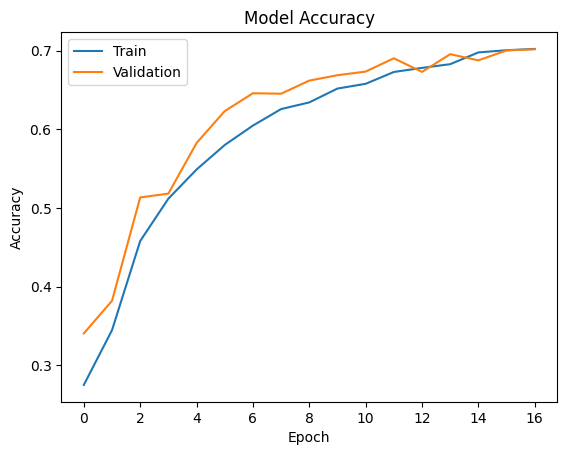

In [37]:
plt.plot(history_gray_2.history['accuracy'])

plt.plot(history_gray_2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

### **Evaluating the Model on the Test Set**

In [38]:
# Evvaluating the grayscale model with a larger architecture on the test set
model_gray_2.evaluate(test_generator_gray_2)

4/4 [==============================] - 0s 37ms/step - loss: 0.6830 - accuracy: 0.7344


[0.682976245880127, 0.734375]

**Observations and Insights:__**
1. After adjusting the data loader to not include the width and height shifting as well as removing the rotation on the images, our neural network has done a lot better.

2. We can see from the graph that the Train and Validation accuracies both plateau at around 70 percent.

3. After evaluating the model on the test set we get a recall of about 74 percent.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [39]:
from tensorflow.keras import backend

backend.clear_session()

In [40]:
data_generator_tla = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    #rotation_range=20,  # Randomly rotate images within the range of 20 degrees
    #width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the width
    #height_shift_range=0.2,  # Randomly shift images vertically by 20% of the height
    #horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range = (0. , 2.),
    shear_range = 0.3
)

# Define the batch size and image size and setting folder path
batch_size = 32
image_size = (64,64)
folder_path = "Facial_emotion_images/"

# Create the train, validation, and test data generators using flow_from_directory
train_generator_tla= data_generator_grayscale_2.flow_from_directory(
    folder_path + 'train',
    target_size=image_size,
    color_mode = 'rgb',
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have categorical labels
    shuffle=True
)

validation_generator_tla = data_generator_grayscale_2.flow_from_directory(
    folder_path + 'validation',
    target_size=image_size,
    color_mode = 'rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator_tla = data_generator_grayscale_2.flow_from_directory(
    folder_path + 'test',
    target_size=image_size,
    color_mode = 'rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [41]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [42]:
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))
vgg.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [43]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

In [44]:
x = Flatten()(transfer_layer.output)

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)

x = Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(4, activation = 'softmax')(x)

# Initializing the model
vggmodel= Model(vgg.input, pred)

### **Compiling and Training the VGG16 Model**

In [45]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [46]:
vggmodel.compile(loss = 'categorical_crossentropy',

              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005),

              metrics = ['accuracy'])

In [47]:
history_vgg = vggmodel.fit(train_generator_tla, epochs=epochs, verbose=1, validation_data=validation_generator_tla, callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3993 - accuracy: 0.3571

473/473 [==============================] - 49s 96ms/step - loss: 1.3993 - accuracy: 0.3571 - val_loss: 1.2062 - val_accuracy: 0.4264 - lr: 5.0000e-04
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.2472 - accuracy: 0.4221

473/473 [==============================] - 44s 93ms/step - loss: 1.2472 - accuracy: 0.4221 - val_loss: 1.1367 - val_accuracy: 0.4858 - lr: 5.0000e-04
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.2039 - accuracy: 0.4543

473/473 [==============================] - 44s 92ms/step - loss: 1.2039 - accuracy: 0.4543 - val_loss: 1.1122 - val_accuracy: 0.5103 - lr: 5.0000e-04
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.1768 - accuracy: 0.4652

473/473 [==============================] - 44s 93ms/step - loss: 1.1768 - accuracy: 0.4652 - val_loss: 1.1159 - val_accuracy: 0.4965 - lr: 5.0000e-04
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.1486 - accuracy: 0.4825

473/473 [==============================] - 55s 115ms/step - loss: 1.1486 - accuracy: 0.4825 - val_loss: 1.1042 - val_accuracy: 0.5186 - lr: 5.0000e-04
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.1368 - accuracy: 0.4934

473/473 [==============================] - 44s 94ms/step - loss: 1.1368 - accuracy: 0.4934 - val_loss: 1.0962 - val_accuracy: 0.5110 - lr: 5.0000e-04
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.1234 - accuracy: 0.4981

473/473 [==============================] - 43s 92ms/step - loss: 1.1234 - accuracy: 0.4981 - val_loss: 1.0994 - val_accuracy: 0.5176 - lr: 5.0000e-04
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 1.1070 - accuracy: 0.5119

473/473 [==============================] - 43s 92ms/step - loss: 1.1070 - accuracy: 0.5119 - val_loss: 1.0932 - val_accuracy: 0.5081 - lr: 5.0000e-04
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 1.0918 - accuracy: 0.5242

473/473 [==============================] - 44s 93ms/step - loss: 1.0918 - accuracy: 0.5242 - val_loss: 1.0803 - val_accuracy: 0.5331 - lr: 5.0000e-04
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 1.0804 - accuracy: 0.5213

473/473 [==============================] - 43s 91ms/step - loss: 1.0804 - accuracy: 0.5213 - val_loss: 1.0868 - val_accuracy: 0.5264 - lr: 5.0000e-04
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 1.0689 - accuracy: 0.5313

473/473 [==============================] - 43s 92ms/step - loss: 1.0689 - accuracy: 0.5313 - val_loss: 1.0539 - val_accuracy: 0.5411 - lr: 5.0000e-04
Epoch 12/20
473/473 [==============================] - ETA: 0s - loss: 1.0582 - accuracy: 0.5371

473/473 [==============================] - 43s 92ms/step - loss: 1.0582 - accuracy: 0.5371 - val_loss: 1.0409 - val_accuracy: 0.5507 - lr: 5.0000e-04
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 1.0596 - accuracy: 0.5305

473/473 [==============================] - 45s 95ms/step - loss: 1.0596 - accuracy: 0.5305 - val_loss: 1.0613 - val_accuracy: 0.5280 - lr: 5.0000e-04
Epoch 14/20
473/473 [==============================] - ETA: 0s - loss: 1.0488 - accuracy: 0.5404

473/473 [==============================] - 44s 94ms/step - loss: 1.0488 - accuracy: 0.5404 - val_loss: 1.0792 - val_accuracy: 0.5101 - lr: 5.0000e-04
Epoch 15/20
473/473 [==============================] - ETA: 0s - loss: 1.0350 - accuracy: 0.5518Restoring model weights from the end of the best epoch: 12.



Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
473/473 [==============================] - 44s 92ms/step - loss: 1.0350 - accuracy: 0.5518 - val_loss: 1.0658 - val_accuracy: 0.5457 - lr: 5.0000e-04
Epoch 15: early stopping


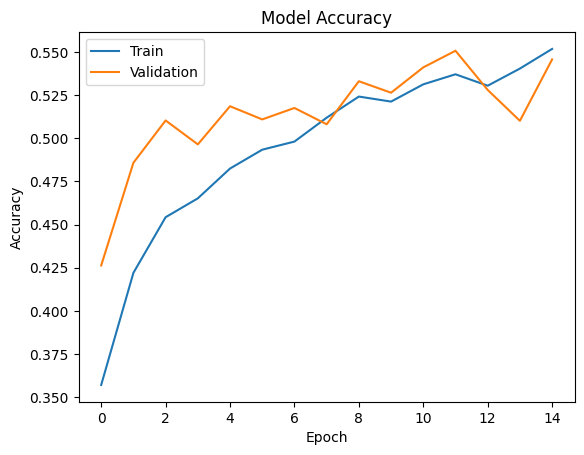

In [48]:
plt.plot(history_vgg.history['accuracy'])

plt.plot(history_vgg.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

### **Evaluating the VGG16 model**

In [49]:
vggmodel.evaluate(test_generator_tla)

4/4 [==============================] - 0s 62ms/step - loss: 1.1002 - accuracy: 0.5000


[1.1001560688018799, 0.5]

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

1. With the VGG Model we see that the performance starts to increase fast but around the 8th epoch it plateaus and struggles to improve past the 50 percent mark.

2. After reaching a max of about 55 percent,the validation performance starts to reduce before getting better again.

3. Evaluating this model on the Test set gave us the accuracy of 50 percent.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [50]:
from tensorflow.keras import backend

backend.clear_session()

In [51]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(64,64,3))
Resnet.summary()

171446536/171446536 [==============================] - 8s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                       

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [52]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False

In [53]:
x = Flatten()(transfer_layer_Resnet.output)

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)

x = Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(4, activation = 'softmax')(x)

# Initializing the model
resnetmodel = Model(Resnet.input, pred)

### **Compiling and Training the Model**

In [54]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [55]:
resnetmodel.compile(loss = 'categorical_crossentropy',

              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005),

              metrics = ['accuracy'])

In [56]:
history_resnet = resnetmodel.fit(train_generator_tla, epochs=epochs, verbose=1, validation_data=validation_generator_tla, callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.5532 - accuracy: 0.2534

473/473 [==============================] - 60s 108ms/step - loss: 1.5532 - accuracy: 0.2534 - val_loss: 1.5580 - val_accuracy: 0.2289 - lr: 5.0000e-04
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.4502 - accuracy: 0.2535

473/473 [==============================] - 58s 123ms/step - loss: 1.4502 - accuracy: 0.2535 - val_loss: 1.4833 - val_accuracy: 0.2289 - lr: 5.0000e-04
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.4335 - accuracy: 0.2563

473/473 [==============================] - 49s 103ms/step - loss: 1.4335 - accuracy: 0.2563 - val_loss: 1.4300 - val_accuracy: 0.2443 - lr: 5.0000e-04
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.4150 - accuracy: 0.2594

473/473 [==============================] - 47s 99ms/step - loss: 1.4150 - accuracy: 0.2594 - val_loss: 1.4175 - val_accuracy: 0.2289 - lr: 5.0000e-04
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.4092 - accuracy: 0.2562

473/473 [==============================] - 58s 122ms/step - loss: 1.4092 - accuracy: 0.2562 - val_loss: 1.4453 - val_accuracy: 0.2289 - lr: 5.0000e-04
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.4031 - accuracy: 0.2569

473/473 [==============================] - 49s 103ms/step - loss: 1.4031 - accuracy: 0.2569 - val_loss: 1.3840 - val_accuracy: 0.2289 - lr: 5.0000e-04
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.4006 - accuracy: 0.2624

473/473 [==============================] - 48s 101ms/step - loss: 1.4006 - accuracy: 0.2624 - val_loss: 1.4047 - val_accuracy: 0.2289 - lr: 5.0000e-04
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 1.3965 - accuracy: 0.2603

473/473 [==============================] - 47s 99ms/step - loss: 1.3965 - accuracy: 0.2603 - val_loss: 1.4040 - val_accuracy: 0.2289 - lr: 5.0000e-04
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 1.3936 - accuracy: 0.2697Restoring model weights from the end of the best epoch: 6.



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
473/473 [==============================] - 58s 123ms/step - loss: 1.3936 - accuracy: 0.2697 - val_loss: 1.3933 - val_accuracy: 0.2289 - lr: 5.0000e-04
Epoch 9: early stopping


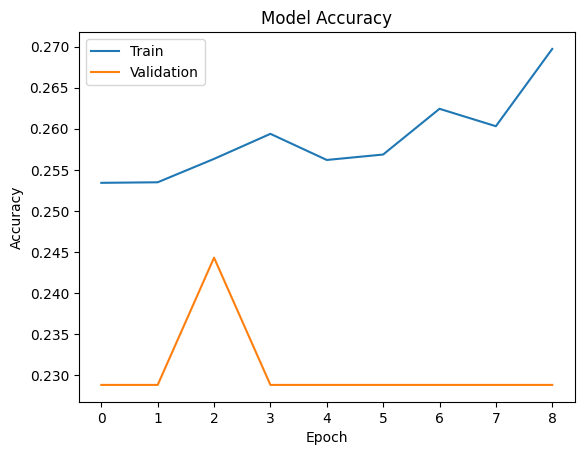

In [57]:
plt.plot(history_resnet.history['accuracy'])

plt.plot(history_resnet.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

### **Evaluating the ResNet Model**

In [58]:
resnetmodel.evaluate(test_generator_tla)

4/4 [==============================] - 0s 72ms/step - loss: 1.3891 - accuracy: 0.2500


[1.3890527486801147, 0.25]

**Observations and Insights:__**
1. We can see that the performance on the validation set tended to stay the same at 23 percent. The performance did not improve at all across 8 epochs.

2. The Training performance increased minimally across the 8 epochs.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [59]:
from tensorflow.keras import backend

backend.clear_session()

In [60]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (64, 64, 3))

EfficientNet.summary()

35839040/35839040 [==============================] - 3s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 64, 64, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 64, 64, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 32, 32, 32)   864         ['normalization[0][0]']          
                 

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [61]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

In [62]:
x = Flatten()(transfer_layer_EfficientNet.output)

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)

x = Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(4, activation = 'softmax')(x)

# Initializing the model
efficient_net_model= Model(EfficientNet.input, pred)

### **Compiling and Training the Model**

In [63]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [64]:
efficient_net_model.compile(loss = 'categorical_crossentropy',

              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005),

              metrics = ['accuracy'])

In [65]:
history_efficientnet = efficient_net_model.fit(train_generator_tla, epochs=epochs, verbose=1, validation_data=validation_generator_tla, callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.5305 - accuracy: 0.2477

473/473 [==============================] - 56s 97ms/step - loss: 1.5305 - accuracy: 0.2477 - val_loss: 1.3496 - val_accuracy: 0.3667 - lr: 5.0000e-04
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.4347 - accuracy: 0.2578

473/473 [==============================] - 43s 92ms/step - loss: 1.4347 - accuracy: 0.2578 - val_loss: 1.3543 - val_accuracy: 0.3667 - lr: 5.0000e-04
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.4164 - accuracy: 0.2618

473/473 [==============================] - 43s 91ms/step - loss: 1.4164 - accuracy: 0.2618 - val_loss: 1.3576 - val_accuracy: 0.3667 - lr: 5.0000e-04
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.4084 - accuracy: 0.2573Restoring model weights from the end of the best epoch: 1.



Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
473/473 [==============================] - 44s 94ms/step - loss: 1.4084 - accuracy: 0.2573 - val_loss: 1.3560 - val_accuracy: 0.3667 - lr: 5.0000e-04
Epoch 4: early stopping


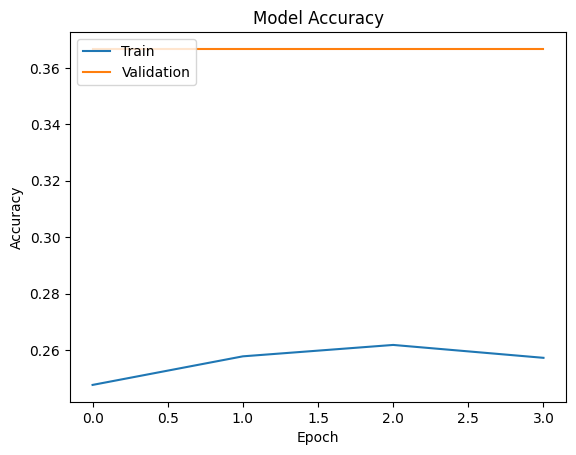

In [66]:
plt.plot(history_efficientnet.history['accuracy'])

plt.plot(history_efficientnet.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

### **Evaluating the EfficientnetNet Model**

In [67]:
efficient_net_model.evaluate(test_generator_tla)

4/4 [==============================] - 0s 62ms/step - loss: 1.4636 - accuracy: 0.2500


[1.4635601043701172, 0.25]

**Observations and Insights:__**
1. Validation Accuracy remained consistent over 3 epochs and similarly the Training Accuracy did not increase in performance.

2. Efficient Net Model performed poorly in comparison to the VGG model and similar in comparison to the RESNET model.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [68]:
from tensorflow.keras import backend

backend.clear_session()

In [69]:
data_generator_grayscale_3 = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    #rotation_range=20,  # Randomly rotate images within the range of 20 degrees
    #width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the width
    #height_shift_range=0.2,  # Randomly shift images vertically by 20% of the height
    #horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range = (0. , 2.),
    shear_range = 0.3
)

# Define the batch size and image size and setting folder path
batch_size = 32
image_size = (64,64)
folder_path = "Facial_emotion_images/"

# Create the train, validation, and test data generators using flow_from_directory
train_generator_gray_3 = data_generator_grayscale_2.flow_from_directory(
    folder_path + 'train',
    target_size=image_size,
    color_mode = 'grayscale',
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have categorical labels
    shuffle=True
)

validation_generator_gray_3 = data_generator_grayscale_2.flow_from_directory(
    folder_path + 'validation',
    target_size=image_size,
    color_mode = 'grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator_gray_3 = data_generator_grayscale_2.flow_from_directory(
    folder_path + 'test',
    target_size=image_size,
    color_mode = 'grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [70]:
model_gray_3 = Sequential()

# First Convolutional layer with 64 nodes and kernel size of 3 x 3 with same padding
model_gray_3.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", input_shape = (64, 64, 1)))

# Applying LeakyRelu
model_gray_3.add(LeakyReLU(0.1))

# Second Convolutional layer with 128 nodes and kernel size of 3x3 with same padding
model_gray_3.add(Conv2D(filters= 128, kernel_size = (3, 3), padding = 'same'))

# Applying Leaky Relu
model_gray_3.add(LeakyReLU(0.1))

# Applying MaxPooling with pool size of 2 x 2
model_gray_3.add(MaxPooling2D(pool_size= (2, 2)))

model_gray_3.add(Dropout(0.5))

model_gray_3.add(LeakyReLU(0.1))

# Third Convolutional layer with 512 nodes
model_gray_3.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same'))

model_gray_3.add(LeakyReLU(0.1))

model_gray_3.add(MaxPooling2D(pool_size= (2, 2)))

model_gray_3.add(BatchNormalization())

# Fourth convolutional layer with 512 nodes
model_gray_3.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same'))

model_gray_3.add(LeakyReLU(0.1))

model_gray_3.add(MaxPooling2D(pool_size = (2,2)))

# Fifth convolutional layer with 128 layers
model_gray_3.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same'))

model_gray_3.add(LeakyReLU(0.1))

# Sixth convolutional layer with 128 nodes
model_gray_3.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same'))

model_gray_3.add(LeakyReLU(0.1))

model_gray_3.add(MaxPooling2D(pool_size= (2,2)))

model_gray_3.add(BatchNormalization())

# Flattening the output from the previous layer
model_gray_3.add(Flatten())

# Applying a dense layer of 32 nodes
model_gray_3.add(Dense(256))

# Applying Leaky Relu with 0.1 slope
model_gray_3.add(LeakyReLU(0.1))

model_gray_3.add(Dropout(0.5))

# Output layer of 4 nodes as per the number of classes with softmax activation
model_gray_3.add(Dense(4, activation = "softmax"))

In [71]:
model_gray_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                        

### **Compiling and Training the Model**

In [72]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 40

In [73]:
model_gray_3.compile(loss = 'categorical_crossentropy',

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),

metrics=['accuracy'])

In [74]:
history_gray_3 = model_gray_3.fit(train_generator_gray_3, epochs=epochs, verbose=1, validation_data=validation_generator_gray_3, callbacks = callbacks_list)

Epoch 1/40
473/473 [==============================] - ETA: 0s - loss: 1.5575 - accuracy: 0.2751

473/473 [==============================] - 45s 81ms/step - loss: 1.5575 - accuracy: 0.2751 - val_loss: 1.3447 - val_accuracy: 0.3351 - lr: 0.0010
Epoch 2/40
473/473 [==============================] - ETA: 0s - loss: 1.3405 - accuracy: 0.3577

473/473 [==============================] - 36s 77ms/step - loss: 1.3405 - accuracy: 0.3577 - val_loss: 1.2105 - val_accuracy: 0.4651 - lr: 0.0010
Epoch 3/40
473/473 [==============================] - ETA: 0s - loss: 1.1197 - accuracy: 0.5022

473/473 [==============================] - 36s 77ms/step - loss: 1.1197 - accuracy: 0.5022 - val_loss: 1.0085 - val_accuracy: 0.5692 - lr: 0.0010
Epoch 4/40
473/473 [==============================] - ETA: 0s - loss: 1.0131 - accuracy: 0.5505

473/473 [==============================] - 37s 79ms/step - loss: 1.0131 - accuracy: 0.5505 - val_loss: 0.9528 - val_accuracy: 0.5959 - lr: 0.0010
Epoch 5/40
473/473 [==============================] - ETA: 0s - loss: 0.9227 - accuracy: 0.6000

473/473 [==============================] - 41s 86ms/step - loss: 0.9227 - accuracy: 0.6000 - val_loss: 1.0237 - val_accuracy: 0.6078 - lr: 0.0010
Epoch 6/40
473/473 [==============================] - ETA: 0s - loss: 0.8455 - accuracy: 0.6448

473/473 [==============================] - 41s 86ms/step - loss: 0.8455 - accuracy: 0.6448 - val_loss: 0.8457 - val_accuracy: 0.6446 - lr: 0.0010
Epoch 7/40
473/473 [==============================] - ETA: 0s - loss: 0.7808 - accuracy: 0.6729

473/473 [==============================] - 41s 86ms/step - loss: 0.7808 - accuracy: 0.6729 - val_loss: 0.8307 - val_accuracy: 0.6584 - lr: 0.0010
Epoch 8/40
473/473 [==============================] - ETA: 0s - loss: 0.7349 - accuracy: 0.6930

473/473 [==============================] - 36s 76ms/step - loss: 0.7349 - accuracy: 0.6930 - val_loss: 0.8185 - val_accuracy: 0.6608 - lr: 0.0010
Epoch 9/40
473/473 [==============================] - ETA: 0s - loss: 0.6949 - accuracy: 0.7149

473/473 [==============================] - 36s 76ms/step - loss: 0.6949 - accuracy: 0.7149 - val_loss: 0.7282 - val_accuracy: 0.7091 - lr: 0.0010
Epoch 10/40
473/473 [==============================] - ETA: 0s - loss: 0.6484 - accuracy: 0.7333

473/473 [==============================] - 37s 78ms/step - loss: 0.6484 - accuracy: 0.7333 - val_loss: 0.8421 - val_accuracy: 0.6944 - lr: 0.0010
Epoch 11/40
473/473 [==============================] - ETA: 0s - loss: 0.6093 - accuracy: 0.7489

473/473 [==============================] - 40s 85ms/step - loss: 0.6093 - accuracy: 0.7489 - val_loss: 0.8023 - val_accuracy: 0.7085 - lr: 0.0010
Epoch 12/40
473/473 [==============================] - ETA: 0s - loss: 0.5550 - accuracy: 0.7774Restoring model weights from the end of the best epoch: 9.



Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 36s 77ms/step - loss: 0.5550 - accuracy: 0.7774 - val_loss: 0.8122 - val_accuracy: 0.6956 - lr: 0.0010
Epoch 12: early stopping


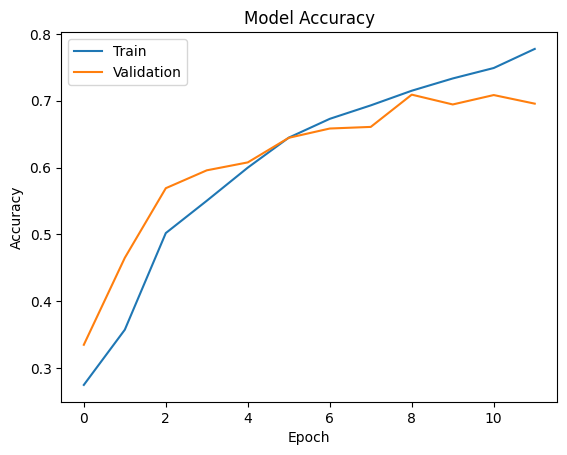

In [75]:
plt.plot(history_gray_3.history['accuracy'])

plt.plot(history_gray_3.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

### **Evaluating the Model on Test Set**

In [76]:
# Evvaluating the grayscale model with a larger architecture on the test set
model_gray_3.evaluate(test_generator_gray_3)

4/4 [==============================] - 0s 45ms/step - loss: 0.6746 - accuracy: 0.7578


[0.6745571494102478, 0.7578125]

**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

4/4 [==============================] - 0s 39ms/step
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.76      0.81      0.79        32
           2       0.72      0.72      0.72        32
           3       0.96      0.84      0.90        32

    accuracy                           0.81       128
   macro avg       0.82      0.81      0.81       128
weighted avg       0.82      0.81      0.81       128



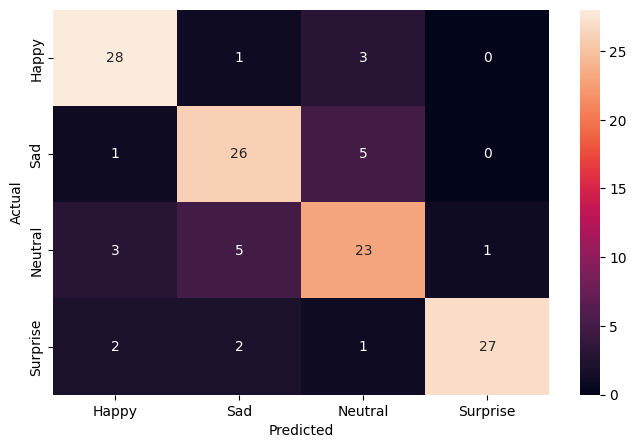

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_gray_3.predict(test_generator_gray_3)
pred = np.argmax(pred, axis = 1)
y_true = test_generator_gray_3.labels

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels= ['Happy', 'Sad', 'Neutral', 'Surprise'], yticklabels=['Happy', 'Sad', 'Neutral', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:__**
1. Based on the evaluation of the test set the more complex Convolutional Network produced a 75 percent accuracy on the Test set.

2. The recall score of the final Network produced an accuracy of 81 percent.

3. We can see that the neural network struggles more between the Neutral and Sad predictions. This could be due to the way the shapes of the mouths and eyes are in the images provided.

4. We can see that Surprise has a precision of 96 percent, where as the Happy emotion has 82 percent.

## **Conclusion:____________**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?